#Imbalanced Classification

## 1. Defining the Question

using past behaviour data, predict whether a customer will leave the bank soon. 

### b) Defining the Metric for Success

Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.

Beta Bank customers are leaving: slowly by slowly, chunning away on a montly basis. The bank has 
figured out it’s easier to manage existing customers from chunning than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.


### d) Recording the Experimental Design

Describe the steps/approach that you will use to answer the given question.




1.   Data Exploration

1.  Data Preparation

1.   Data Modeling
2.   Summary of Findings and Recommendations

2.   Imbalanced Classification



















### e) Data Relevance

How relevant was the provided data?
Answer: the provided data met the for relevancy

# Data importation

In [3]:
# We import our libraries 
# ---
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import tree

## 2. Reading the Data

In [4]:
# we read our data
# Dataset URL (CSV File): https://bit.ly/2XZK7Bo

beta_df = pd.read_csv('https://bit.ly/2XZK7Bo')

beta_df.head()





,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


# We do our data exploration

In [5]:
# we check the size of our dataset

beta_df.shape

(10000, 14)

In [6]:
# Check datatypes
# ---
beta_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# Checking datatypes in depth
beta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
# Checking for null values 
beta_df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
# check for duplicate values in our dataset
beta_df.duplicated().sum()

0

In [10]:
# Summary statatistics for the data set
beta_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observations as below:


*   The data provided has 10000 rows and 14 columns, it also has zero duplicates and 909 missing values



## 4. Data Preparation and Cleaning

In [11]:
# standardize column names to lower case and strip leading and trailing whitespaces
beta_df.columns = beta_df.columns.str.lower().str.strip()
beta_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [12]:
#we need fix Missing values in tenure with mean
beta_df.fillna(beta_df.mean(), inplace=True)
# Check for Null values 
beta_df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [13]:
#drop columns unnecessary like rownumber, customerid and surname

beta_df.drop(['rownumber', 'customerid', 'surname'], axis =1, inplace=True)

beta_df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


##Solution Implementation




In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [15]:
# Geograpy and Gender needs to be changed to categorical data.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

beta_df["gender"] = le.fit_transform(beta_df["gender"])
beta_df["geography"] = le.fit_transform(beta_df["geography"])

In [16]:
# Check new df with categorical data 
beta_df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
# Splitting the dataframe

features = beta_df.drop("exited", axis = 1)
target = beta_df["exited"]

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.25, random_state = 12)

print(f'X_train has {X_train.shape[0]} rows, Y_train also has  {Y_train.shape[0]} rows')

print(f'X_test has {X_test.shape[0]} rows, Y_test also has  {Y_test.shape[0]} rows')

X_train has 7500 rows, Y_train also has  7500 rows
X_test has 2500 rows, Y_test also has  2500 rows


##Without taking into account the class imbalance

In [18]:
#  Looking at the class imbalance:
print("Exited", beta_df[beta_df['exited'] == 1]['exited'].count())
print("Did not exit", beta_df[beta_df['exited'] == 0]['exited'].count())

Exited 2037
Did not exit 7963


In [19]:
#Assuming theclass imbalance:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

imbalanced_log_model= LogisticRegression(solver='liblinear', random_state=12345)
imbalanced_log_model.fit(X_train,Y_train)
print('Accuracy', imbalanced_log_model.score(X_test, Y_test))
print('F1 score:' ,f1_score(Y_test, imbalanced_log_model.predict(X_test)))
print('AUC:', roc_auc_score(Y_test, imbalanced_log_model.predict_proba(X_test)[:,1]))

Accuracy 0.7764
F1 score: 0.08510638297872342
AUC: 0.675826005861977


##Taking into account the class imbalance

In [20]:
# First we upsample our data
from sklearn.utils import shuffle
def upsample(X, y, repeat):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(X_train, Y_train, 10)

model_up = LogisticRegression(random_state=42, solver='liblinear')
model_up.fit(features_upsampled, target_upsampled)
predicted_valid = model_up.predict(X_test)
print('F1 score:', f1_score(Y_test, predicted_valid))

F1 score: 0.3957337256344244


Observation:

Some improvements noted although we did not achieve our target of F1 score of 0.59

In [21]:
# We can try Down Sampling
# Improving the Model through Down Sampling

def downsample(X, y, fraction):
    features_zeros = X[y == 0]
    features_ones = X[y == 1]
    target_zeros = y[y == 0]
    target_ones = y[y == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)]+ [features_ones])

    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)]+ [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=42)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(X_train, Y_train, 0.1)

model_down = LogisticRegression(random_state=42, solver='liblinear')
model_down.fit(features_downsampled, target_downsampled)
predicted_valid = model_down.predict(X_test)
print('F1 score:', f1_score(Y_test, predicted_valid))

F1 score: 0.37289278489548205


Observation

improvements noted though target not achieved. The score is almost similar to upsapmling. The model can further be improved with Random Forests Classifiers and using grid search to get the best parameters

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
depth_param = {'n_estimators':range(1,200)}
RandForestMod = RandomForestClassifier(random_state=42, max_depth = 8,class_weight='balanced')
RandForestOpt = GridSearchCV(RandForestMod, depth_param)
RandForestOpt.fit(X_train, Y_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(X_test)
print("F1 score:", f1_score(Y_test, RandForestOpt_predicted_valid))
print('Accuracy:', RandForestOpt.score(X_test, Y_test))
print("AUC-ROC:", roc_auc_score(Y_test, RandForestOpt.predict_proba(X_test)[:,1]))

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=139,
                       random_state=42)
F1 score: 0.6287625418060201
Accuracy: 0.8224
AUC-ROC: 0.8582596885454599


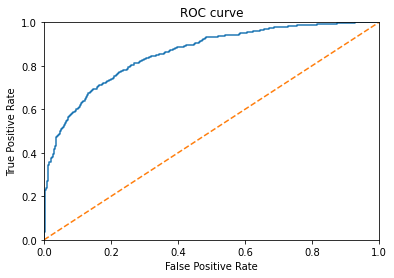

In [23]:
# Plotting the AUC-ROC curve.
import matplotlib.pyplot as plt
probabilities_valid = RandForestOpt.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

##Conclusion 

We used Random Forest Classifier with the class_weight parameter which means to set it ' balanced ' to achieve our desired F1 score, grid search was also used to get the best Hyper parameters

This led F1 score of 0.63, which is close enough to our desired target, with Accuracy of 0.822 and AUC-ROC of 0.86.

These metrics represent a good model and meet the expectations of the assignment.